In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_titanic=pd.read_csv("titanic.csv")
data_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(len(data_titanic.index))

891


In [4]:
data_titanic.shape

(891, 12)

In [5]:
data_titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

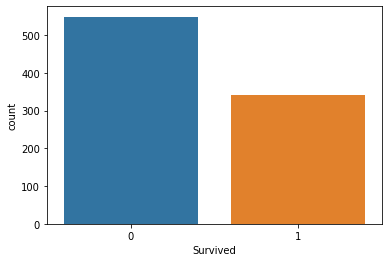

In [6]:
sns.countplot(x="Survived",data=data_titanic)

In [7]:
data_titanic[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


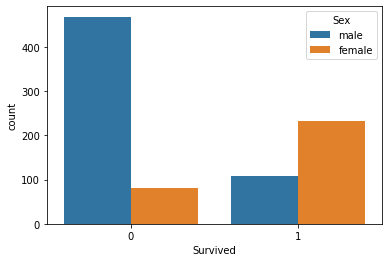

In [8]:
sns.countplot(x="Survived",hue="Sex",data=data_titanic)

In [9]:
data_titanic[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


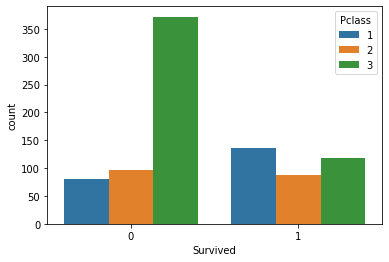

In [10]:
sns.countplot(x="Survived",hue="Pclass",data=data_titanic)

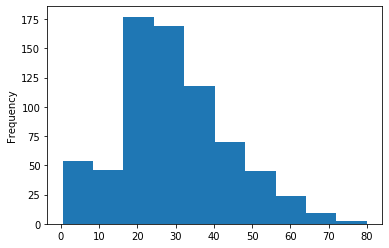

In [11]:
data_titanic["Age"].plot.hist()

In [12]:
data_titanic.Age.agg(['max','min','median','mean'])

max       80.000000
min        0.420000
median    28.000000
mean      29.699118
Name: Age, dtype: float64

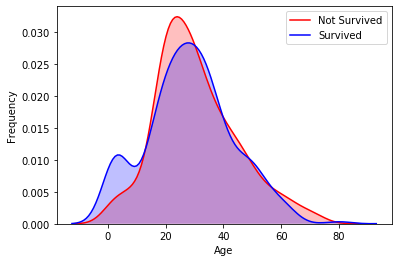

In [13]:
g = sns.kdeplot(data_titanic["Age"][(data_titanic["Survived"] == 0) & (data_titanic["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_titanic["Age"][(data_titanic["Survived"] == 1) & (data_titanic["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

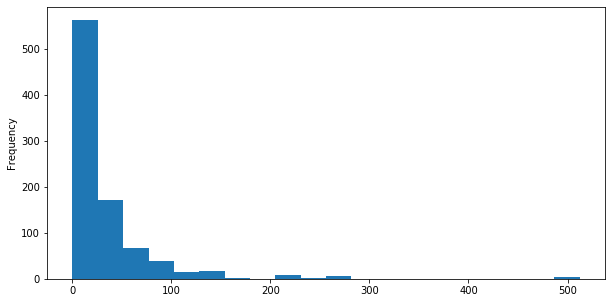

In [14]:
data_titanic["Fare"].plot.hist(bins=20,figsize=(10,5))

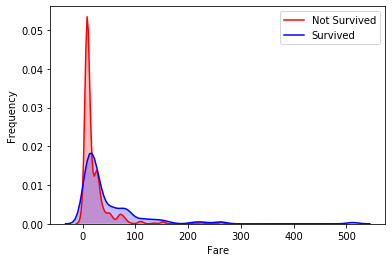

In [15]:
g = sns.kdeplot(data_titanic["Fare"][(data_titanic["Survived"] == 0) & (data_titanic["Fare"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_titanic["Fare"][(data_titanic["Survived"] == 1) & (data_titanic["Fare"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

In [16]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
data_titanic[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


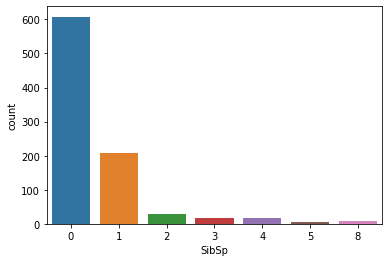

In [18]:
sns.countplot(x="SibSp",data=data_titanic)

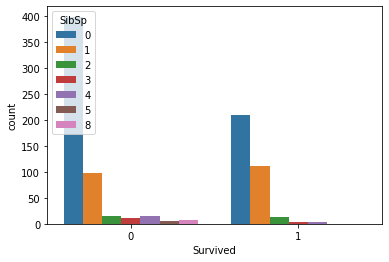

In [19]:
sns.countplot(x='Survived',hue='SibSp',data=data_titanic)

In [20]:
data_titanic[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


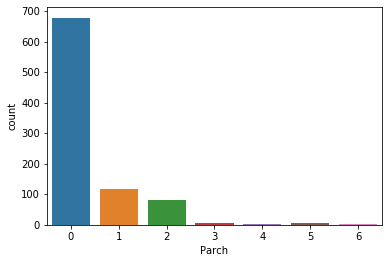

In [21]:
sns.countplot(x="Parch",data=data_titanic)

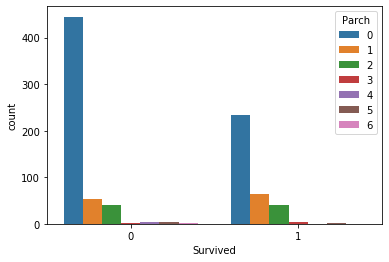

In [22]:
sns.countplot(x='Survived',hue='Parch',data=data_titanic)

In [23]:
data_titanic[data_titanic.Embarked=='S'].Survived.value_counts()

0    427
1    217
Name: Survived, dtype: int64

In [24]:
data_titanic[data_titanic.Embarked=='C'].Survived.value_counts()

1    93
0    75
Name: Survived, dtype: int64

In [25]:
data_titanic[data_titanic.Embarked=='Q'].Survived.value_counts()

0    47
1    30
Name: Survived, dtype: int64

In [26]:
data_titanic[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


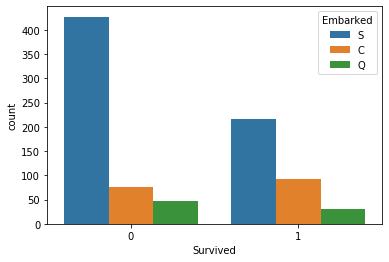

In [27]:
sns.countplot(x='Survived',hue='Embarked',data=data_titanic)

In [28]:
data_title = [i.split(",")[1].split(".")[0].strip() for i in data_titanic["Name"]]
data_titanic["Title"] = pd.Series(data_title)
data_titanic["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

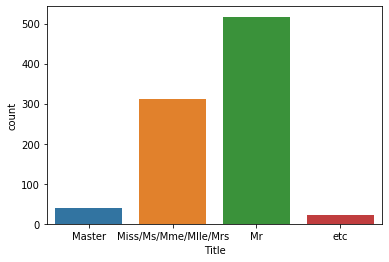

In [29]:
data_titanic["Title"] = data_titanic["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'etc')
data_titanic["Title"] = data_titanic["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "etc":3})
data_titanic["Title"] = data_titanic["Title"].astype(int)
g = sns.countplot(data_titanic["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","etc"])

In [30]:
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [31]:
age_mean=data_titanic['Age'].mean()
print(age_mean)

29.69911764705882


In [32]:
data_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [33]:
data_titanic.drop("Cabin", axis=1, inplace=True)
data_titanic.drop("PassengerId", axis=1, inplace=True)
data_titanic.drop("Name",axis=1,inplace=True)
data_titanic.drop("Ticket", axis=1, inplace=True)
data_titanic.drop("Fare",axis=1,inplace=True)
data_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,2


In [34]:
data_titanic.fillna({'Age':age_mean,'Embarked':'S'},inplace=True)

In [35]:
data_titanic["SibSp"] = data_titanic["SibSp"].map({0:0, 1:1, 2:2 , 3:2, 4:3, 5:3, 8:3})
data_titanic["Parch"] = data_titanic["Parch"].map({0:0, 1:1, 2:2 , 3:2, 4:3, 5:3, 6:3})
data_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,2


In [36]:
data_titanic[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.386364
3,3,0.100000


In [37]:
data_titanic[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.505882
3,3,0.100000


In [38]:
data_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,2


In [39]:
x=data_titanic.iloc[:,1:8].values
y=data_titanic.iloc[:,0].values
print(x)

[[3 'male' 22.0 ... 0 'S' 2]
 [1 'female' 38.0 ... 0 'C' 1]
 [3 'female' 26.0 ... 0 'S' 1]
 ...
 [3 'female' 29.69911764705882 ... 2 'S' 1]
 [1 'male' 26.0 ... 0 'C' 2]
 [3 'male' 32.0 ... 0 'Q' 2]]


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1,3,4,5,6])],remainder="passthrough")
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 0.0 ... 0.0 3 22.0]
 [1.0 0.0 0.0 ... 0.0 1 38.0]
 [1.0 0.0 1.0 ... 0.0 3 26.0]
 ...
 [1.0 0.0 0.0 ... 0.0 3 29.69911764705882]
 [0.0 1.0 1.0 ... 0.0 1 26.0]
 [0.0 1.0 1.0 ... 0.0 3 32.0]]


In [41]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
x=norm.fit_transform(x)
print(x)

[[0.         1.         0.         ... 0.         1.         0.27117366]
 [1.         0.         0.         ... 0.         0.         0.4722292 ]
 [1.         0.         1.         ... 0.         1.         0.32143755]
 ...
 [1.         0.         0.         ... 0.         1.         0.36792055]
 [0.         1.         1.         ... 0.         0.         0.32143755]
 [0.         1.         1.         ... 0.         1.         0.39683338]]


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(x_train)
X_test=pca.transform(x_test)

explain_varience=pca.explained_variance_ratio_
print(explain_varience)

[3.85359307e-01 1.57492815e-01 1.25128447e-01 8.73593030e-02
 7.34337204e-02 4.72834827e-02 3.72989714e-02 2.88053016e-02
 2.42060350e-02 1.16448917e-02 9.73361115e-03 6.48277325e-03
 4.98058790e-03 7.90753403e-04 1.66374354e-31 2.10601054e-32
 1.23471423e-32 4.84462481e-33 3.63342509e-33]


In [44]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier(n_estimators=370,max_depth=6,random_state=0)
ranfor.fit(x_train,y_train)
y_pred=ranfor.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc=accuracy_score(y_test,y_pred)
print(acc)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[[97 13]
 [18 51]]
0.8268156424581006


In [45]:
from sklearn.neighbors import KNeighborsClassifier
classi=KNeighborsClassifier(n_neighbors=100,metric="minkowski",p=2,weights='distance')
classi.fit(x_train,y_train)
y_pred1=classi.predict(x_test)
print(y_pred1)

from sklearn.metrics import accuracy_score, confusion_matrix
cm1=confusion_matrix(y_test,y_pred1)
print(cm1)
acc1=accuracy_score(y_test,y_pred1)
print(acc1)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[[95 15]
 [18 51]]
0.8156424581005587


In [46]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(x_train,y_train)
y_pred2=tree.predict(x_test)
print(y_pred2)

from sklearn.metrics import accuracy_score, confusion_matrix
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)
acc2=accuracy_score(y_test,y_pred2)
print(acc2)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[[94 16]
 [20 49]]
0.7988826815642458


In [47]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)
y_pred3=naive.predict(x_test)
print(y_pred3)

from sklearn.metrics import confusion_matrix, accuracy_score
acc3=accuracy_score(y_test,y_pred3)
print(acc3)
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
0.776536312849162
[[84 26]
 [14 55]]


In [48]:
from sklearn.svm import SVC
classi=SVC(kernel='rbf')
classi.fit(x_train,y_train)
y_pred4=classi.predict(x_test)
print(y_pred4)

from sklearn.metrics import accuracy_score, confusion_matrix
cm4=confusion_matrix(y_test,y_pred4)
print(cm4)
acc4=accuracy_score(y_test,y_pred4)
print(acc4)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[[97 13]
 [18 51]]
0.8268156424581006


In [49]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(class_weight='balanced')
log.fit(x_train,y_train)
y_pred5=log.predict(x_test)
print(y_pred5)

from sklearn.metrics import accuracy_score, confusion_matrix
cm5=confusion_matrix(y_test,y_pred5)
print(cm5)
acc5=accuracy_score(y_test,y_pred5)
print(acc5)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[[90 20]
 [13 56]]
0.8156424581005587
